# Get Immutable Reference Benchmarks

In [18]:
# select measurement file
#file_name = "../output/2024-05-22 10-14-20 get1.json"
file_name = "../output/2024-08-27 11-40-37 full.json"

# select style options
grey_fill_between = False

if grey_fill_between:
    fill_between_args = {"color": "grey"}
else:
    fill_between_args = {}

In [19]:
# parse data
import json

with open(file_name) as file:
    raw_data = json.load(file)

In [20]:
from util.convert import get_storage_measurement
from IPython.core.display import HTML

# filter and convert data

(storage_read, storage_write) = get_storage_measurement(raw_data)

storage_read_long = storage_read.loc[storage_read["options.object_size"] == storage_read["options.object_size"].max()]
storage_write_long = storage_write.loc[storage_write["options.object_size"] == storage_write["options.object_size"].max()]

storage_read = storage_read.loc[storage_read["options.object_size"] < storage_read["options.object_size"].max()]
storage_write = storage_write.loc[storage_write["options.object_size"] < storage_write["options.object_size"].max()]

display(HTML("<b>READ Data:</b>"))
display(storage_read.head())
display(HTML("<b>WRITE Data:</b>"))
display(storage_write.head())
display(HTML("<b>Long READ Data:</b>"))
display(storage_read_long)
display(HTML("<b>Long WRITE Data:</b>"))
display(storage_write_long)


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,616.0,616,616,0,esp32c3,100,1000,16000
1,1095.0,1095,1095,32,esp32c3,100,1000,16000
2,1433.0,1433,1433,64,esp32c3,100,1000,16000
3,1911.0,1911,1911,96,esp32c3,100,1000,16000
4,2249.0,2249,2249,128,esp32c3,100,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
0,1136.000,1136,1136,0,esp32c3,100,1000,16000
1,1532.000,1532,1532,32,esp32c3,100,1000,16000
2,1789.000,1789,1789,64,esp32c3,100,1000,16000
3,2185.136,2185,2258,96,esp32c3,100,1000,16000
4,2442.000,2442,2442,128,esp32c3,100,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
30,182862.0,182862,182862,8192,esp32c3,100,1000,16000


,mean,min,max,options.object_size,machine_name,cold_start,repetitions,ticks_per_ms
30,150486.0,150486,150486,8192,esp32c3,100,1000,16000


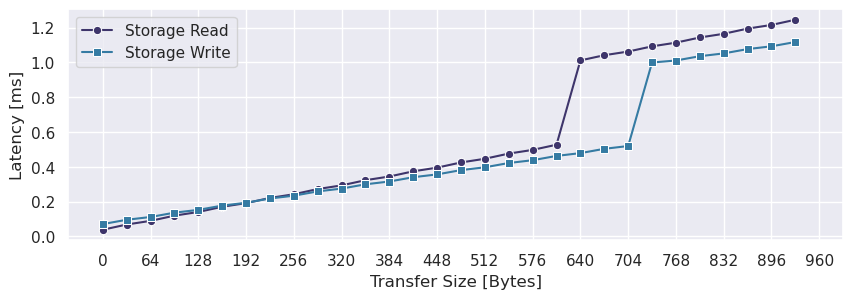

In [21]:
from util.plot import set_gird, save_plot, set_theme
from util.convert import scale_data
import seaborn as sns
import matplotlib.pyplot as plt

set_theme(3, 0)

fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(10)

unit = "ms"

if len(storage_read) != 0:
    storage_read_scaled = scale_data(storage_read, unit)
    sns.lineplot(ax=ax, data=storage_read_scaled, x="options.object_size", y="mean", label="Storage Read", markers=["o"], marker="o", 
        #linewidth=3.5, markersize=8
    )
    ax.fill_between(storage_read_scaled["options.object_size"], storage_read_scaled["min"], storage_read_scaled["max"], alpha=0.2, **fill_between_args)

if len(storage_write) != 0:
    storage_write_scaled = scale_data(storage_write, unit)
    sns.lineplot(ax=ax, data=storage_write_scaled, x="options.object_size", y="mean", label="Storage Write", markers=["o"], marker="s")
    ax.fill_between(storage_write_scaled["options.object_size"], storage_write_scaled["min"], storage_write_scaled["max"], alpha=0.2, **fill_between_args)

set_gird(64, max(storage_read["options.object_size"].max(), storage_write["options.object_size"].max()), ax)

ax.set_xlabel("Transfer Size [Bytes]")
ax.set_ylabel(f"Latency [{unit}]")
#ax.set_ylim(bottom=-4, top=50)
leg = ax.legend()

# unify legend
for line in leg.get_lines():
    line.set_linewidth(leg.get_lines()[-1].get_linewidth())
    line.set_markersize(leg.get_lines()[-1].get_markersize())

save_plot("spi_fram", save_asset=True)